## Proximal operators

### Part A

The local linear approximation of $f(x)$ about a point $x_0$:

$$f(x) \approx \hat{f}(x; x_0) = f(x_0) + (x - x_0)^{(t)} \bigtriangledown{f}(x_0)$$

Plug $\hat{f}(x; x_0)$ into Moreau envelop function $E_\gamma f(x)$:

$$E_{\gamma} f(x) = min_z \left\{f(z) + \frac {1}{2\gamma} \|z - x\|_2^2 \right\}$$

$$= min_z \left\{f(x_0) + (z - x_0)^T \bigtriangledown f(x_0) + \frac{1}{2\gamma} \|z - x\|^2 \right\}$$

Take derivative:

$$\bigtriangledown f(x_0) + \frac {1}{\gamma} \|z - x_\| = 0$$

Therefore,

$$z = x - \gamma \bigtriangledown f(x_0) $$

The proximal operator of the linear approximation is $prox_{\gamma}\hat{f}(x; x_0) = x - \gamma \bigtriangledown f(x_0)$

In gradient descent, if the step size for $f(x)$ is $\gamma$, starting from the point $x_0$, then $z = x_0 - \gamma \bigtriangledown f(x_0)$, which is exactly identical to the proximal operator.


### Part B

Consider a negative log likelihood of the form

$$l(x) = \frac {1}{2} x^T P x - q^T x + r \space\space\space\space\space\space\space\space\space\space\space (1)$$

Plug $l(x)$ into Moreau envelop function $E_\gamma f(x)$:

$$E_{\gamma} f(x) = min_z \left\{f(z) + \frac {1}{2\gamma} \|z - x\|_2^2 \right\}$$

$$= min_z \left\{\frac{1}{2} z^T P z - q^T z + r + \frac{1}{2}\gamma \| z - x\|^2 \right\}$$

Take derivative:

$$zP - q - \gamma(z - x) = 0$$

Therefore,

$$z = (P + \gamma I)^{-1} (q + \gamma x)$$

The proximal operator with parameter $\frac{1}{\gamma}$ of $l(x)$ is $prox_{\frac{1}{\gamma}} = (P + \gamma I)^{-1} (q + \gamma x)$.

If we have a Guassian sampling model of the form $(y | x) \sim N(Ax, \Omega^{-1})$, then its log likelihood is

$$loglik \propto \sum \frac {(y - Ax)^2}{2 \Omega^{-1}}$$

$$= \frac{1}{2} (y - Ax)^T \Omega (y - Ax)$$

$$= \frac{1}{2} (y^T \Omega - x^T A^T \Omega)(y - Ax)$$

$$= \frac{1}{2} (y^T \Omega y + x^T A^T \Omega A x - y^T \Omega A x - x^T A^T \Omega y)$$

$$= \frac{1}{2} (y^T \Omega y + x^T A^T \Omega A x - 2 y^T \Omega A x)$$

$$= \frac{1}{2} x^T A^T \Omega A x - y^T \Omega A x + \frac{1}{2}y^T \Omega y$$

Compared with equation(1):

$$p = A^T \Omega A$$

$$q = A^T \Omega y$$

$$r = \frac{1}{2} y^T \Omega y$$

### Part C

Let $\phi(x) = \tau \|x\|$,

Plug it into Moreau envelop:

$$E_{\gamma} \phi(x) = min_z \left\{\tau \|z\| + \frac {1}{2\gamma}\|z - x\|^2  \right\}$$

Take derivative:

When $z > 0$,

$$\tau + \frac{1}{\gamma} (z-x) = 0$$

$$\Rightarrow z = x - \gamma \tau$$

Therefore, $x > \gamma \tau$

When $z < 0$,

$$- \tau + \frac{1}{\gamma} (z - x) = 0$$

$$\Rightarrow z = x + \gamma \tau$$

Therefore, $x < -\gamma \tau$

When $z = 0$,

$$E_{\gamma} \phi(x) = min_z \left\{\frac{1}{2 \gamma} \|-x\|^2\right\}$$

Its derivative is 0, and $-\gamma \tau \le x \le \gamma \tau$.

Combine all three situations,

$$z = sign(x) (|x| - \gamma \tau)_+$$

## The proximal gradient method

### Part A

Suppose that we have some objective function that can be expressed as $f(x) = l(x) + \phi(x)$, where $\(x)$ is differentiable but $\phi(x)$ is not.

A local linear approximation to the first term in the objective $l(x)$ is

$$l(x) \approx \tilde{l}(x; x_0) = l(x_0) + (x - x_0)^{(t)} \bigtriangledown l(x_0) + \frac{1}{2\gamma}\|x - x_0\|^2$$

Therefore, the approximation for the original objective is 

$$f(x) \approx \tilde {f}(x; x_0) = \tilde {l}(x; x_0) + \phi(x)$$

Plug it into Moreau Envelop function

$$E_{\gamma} \tilde{f}(x; x_0) = min_z \left\{l(x_0) + (z - x_0)^T \bigtriangledown l(x_0) + \frac{1}{2\gamma} \|z - x_0\|^2 + \phi(z)\right\}$$

Take derivative:

$$\bigtriangledown l(x_0) + \frac{1}{\gamma} (z - x_0) + \phi'(z) = 0$$

$$\phi'(z) = - \frac{1}{\gamma} (z - x_0) - \bigtriangledown l(x_0)$$

In order to minimize $\phi(z)$

$$\phi'(z) = - \frac{1}{\gamma} (z - x_0) - \bigtriangledown l(x_0) = 0$$

Therefore,

$$z = x_0 - \gamma \bigtriangledown l(x_0)$$

### Part B

Pseudo-code for proximal gradient descent

```
# step 1
input X, y;
initialize betas0;
set lambda, gamma;  # lambda -> penalty, gamma -> step size

while iter < maxiter:
    # calculate gradient descent
    l_prime = - 2 * t(y) * X + 2 * t(betas) * t(X) * X;
    # update mu
    mu = betas - gamma * l.prime;
    # update betas 
    betas.new = sign(mu) * max(0, abs(u) - gamma*lambda);
    betas = betas.new
return betas;
```

In [257]:
# read data
setwd("~/Box Sync/PhDCourses/SDS385Statistical_models_for_big_data/SDS385/data/")
X = read.csv('diabetesX.csv')
X = as.matrix(X)
X = scale(X)
y = read.csv('diabetesY.csv', header=F)
y = as.matrix(y)
y = scale(y)

Now fit lasso regression to data using function `glmnet`.

In [258]:
# fit lasso using function 'glmnet'
library('glmnet')
fit.glm = glmnet(X, y, s=0.02)

In [270]:
# tracking in-sample MSE
lambdas.glm = fit.glm$lambda
predictions.glm = predict(fit.glm, newx = X, type = "response", s = lambdas.glm)

# calculate MSE
MSE.glm <- matrix(0, ncol=length(lambdas.glm))
for (i in 1:length(lambdas.glm)) {
    MSE.glm[i] <- 1/dim(X)[1] * t(as.matrix(y - predictions.glm[, i])) %*% as.matrix(y - predictions.glm[, i])
}

lambda.min.glm = lambdas.glm[which(MSE.glm == min(MSE.glm))]
print (paste("lambda.min is", lambda.min.glm))
print (paste("MSE min is", min(MSE.glm)))

[1] "lambda.min is 5.85786353690978e-05"
[1] "MSE min is 0.40926161713252"


Fitting lasso regression to data using my proximal gradient descent function. Here same lambdas are used in fitting process.

In [265]:
# call source code
source('~/Box Sync/PhDCourses/SDS385Statistical_models_for_big_data/SDS385/solutions/exercises06/prox_gd.R')

In [271]:
betas0 = matrix(0, nrow=ncol(X))
# test my proximal gradient descent code
lambdas = lambdas.glm
prox.gd.betas = matrix(0, nrow=ncol(X), ncol=length(lambdas))
for (i in 1:length(lambdas)) {
    prox.gd <- proximal_gd(X, y, betas0, lambda=lambdas[i], gamma=0.05, maxiter=5000)
    prox.gd.betas[, i] <- prox.gd[[1]][, 5001]
}

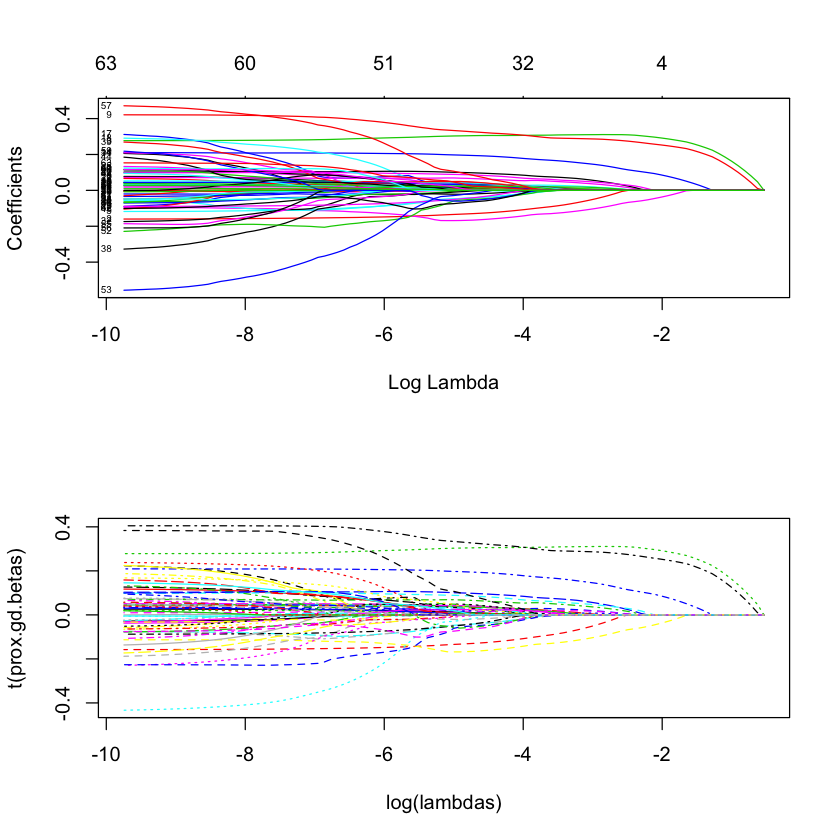

In [299]:
par(mfrow=c(2,1))
plot(fit.glm, xvar = "lambda", label = TRUE)
matplot(log(lambdas) ,t(prox.gd.betas), type = 'l', pch=1, col = 1:ncol(X))

From above plots, we can see that the performance of my proximal gradient descent is very similar to that of `glmnet`.

Next, I compared betas estimated from two functions. Actually, they are very similar...

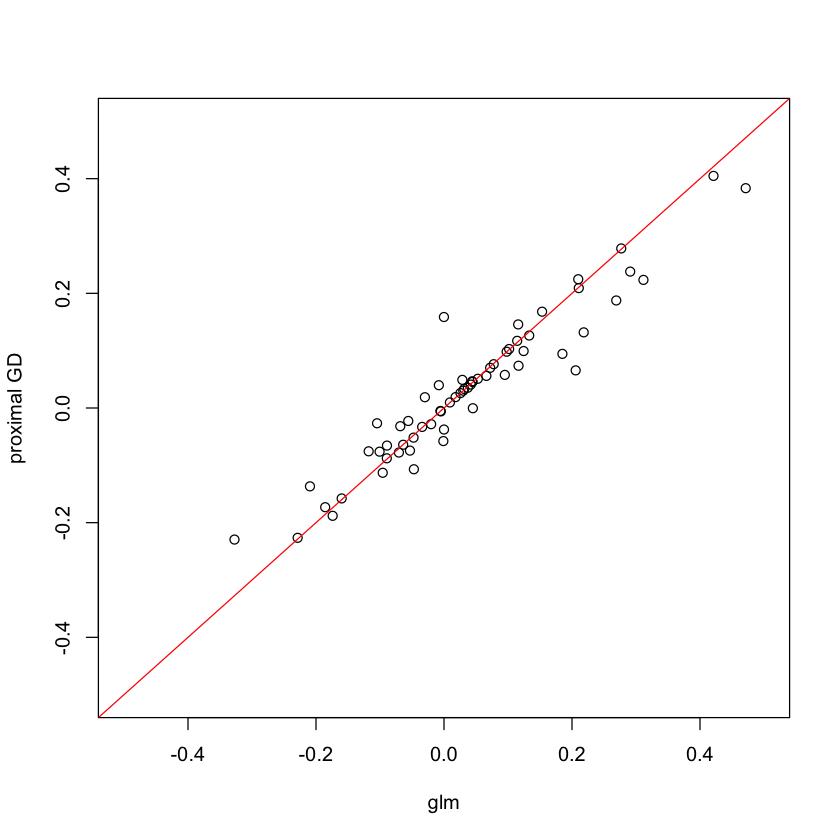

In [343]:
betas.glm = coef(fit.glm, s=lambda.min.glm)[2:65]
betas.prox.gd = prox.gd.betas[, which (lambdas == '5.85786353690978e-05')]
plot(betas.glm, betas.prox.gd, xlab='glm', ylab='proximal GD', xlim=c(-0.5, 0.5), ylim=c(-0.5, 0.5))
abline(a=0, b=1, col='red')

### Part C

In [345]:
# call source code
source('~/Box Sync/PhDCourses/SDS385Statistical_models_for_big_data/SDS385/solutions/exercises06/prox_gd.R')

In [346]:
betas0 = matrix(0, nrow=ncol(X))
# test accelerated proximal gradient descent code
prox.agd <- acc_proximal_gd(X, y, betas0, lambda=5.85786353690979e-05, gamma=0.05, maxiter=5000)

In [351]:
betas0 = matrix(0, nrow=ncol(X))
# proximal gradient descent code
prox.gd <- proximal_gd(X, y, betas0, lambda=5.85786353690979e-05, gamma=0.05, maxiter=5000)

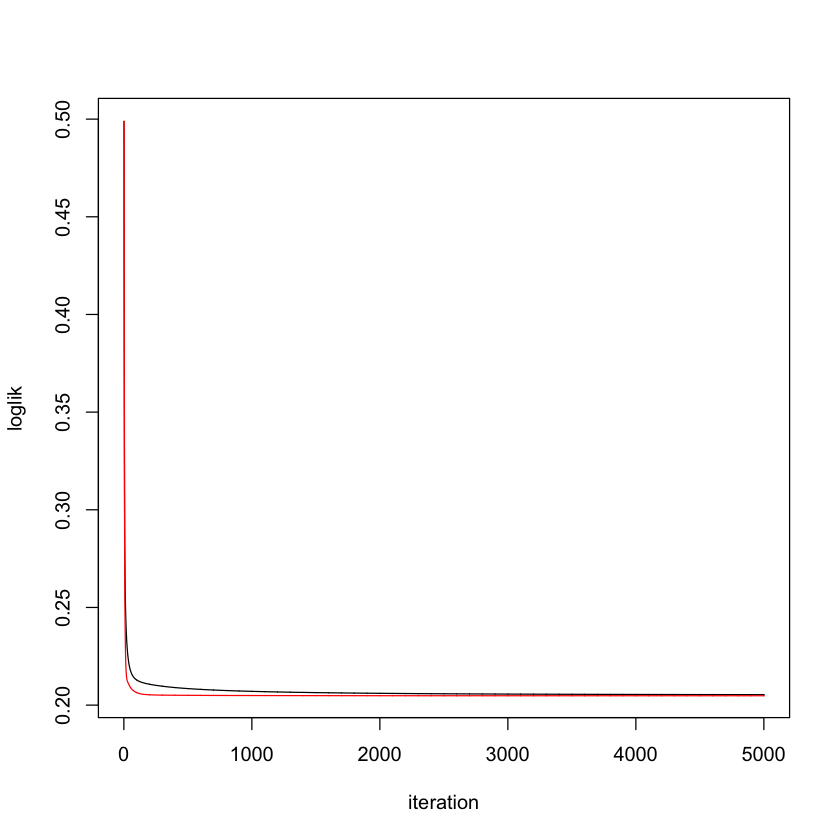

In [352]:
# compare convergency speed of proximal gradient descent and accelerated proximal gradient descent
plot(prox.gd[[2]], type='l', xlab='iteration', ylab='loglik')
lines(prox.agd[[2]], col='red')

From the above plot, we can see that accelerated proximal GD are converged more quickly than that of proximal GD.